<a href="https://colab.research.google.com/github/fabiobaroliveira/gerador_base_de_dados/blob/main/vendas_veiculos_seminovos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Necessário instalar biblioteca Faker
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
from faker import Faker
fake = Faker('pt_BR')

# Listas de valores possíveis
marcas_modelos = {
    "Fiat" : [ "Mobi","Argo", "Cronos", "500e", "Pulse", "Fastback", "Strada", "Toro", "Fiorino"],
    "Volskwagen" : [ "Up", "Gol", "Voyage", "Saveiro", "Polo", "Virtus", "Nivus", "T-Cross", "Amarok"],
    "Chevrolet" : [ "Onix", "Prisma", "Cruze", "Tracker", "S-10", "TrailBlazer"],
    "Hyundai" : [ "HB20", "HB20S", "Creta", "Tucson"],
    "Honda" : [ "Civic", "HR-V", "City", "Fit", "CR-V"],
    "Toyota" : [ "Etios","Yaris","Corolla", "Camry", "Corolla Cross", "Hilux"],
    "Ford" : [ "Ka", "Ka Sedan", "Ecosport", "Ranger", "Focus", "Territory"],
    "Peugeot" : [ "208" , "308", "2008", "3008", "Partner"],
    "Citroen" : [ "C3", "Aircross", "C4", "C4 Grand Picasso", "Basalt"],
    "Jeep" : [ "Compass", "Renegade", "Wrangler", "Cherokee"]
}

formas_pagamento = ["À vista", "Financiamento", "Consórcio", "Leasing"]

cores = ["Preto", "Branco", "Prata", "Vermelho", "Azul", "Verde", "Cinza"]

sexo_opcoes = ["Masculino", "Feminino"]

# Gerando os dados fictícios
dados = []
for i in range(1, 1001):
  sexo = random.choice(sexo_opcoes)
  nome = fake.first_name_male() if sexo == "Masculino" else fake.first_name_female()
  sobrenome = fake.last_name()
  nome_completo = f"{nome} {sobrenome}"
  idade = random.randint(18, 70)
  cpf = fake.cpf()
  email = fake.email()
  telefone = fake.phone_number()
  cidade = fake.city()
  estado = fake.state_abbr()
  marca = random.choice(list(marcas_modelos.keys()))
  modelo = random.choice(marcas_modelos[marca])
  ano_fabricacao = random.randint(2014, 2024)
  cor = random.choice(cores)
  valor_venda = round(random.uniform(30000, 250000), 2)
  data_venda = fake.date_between(start_date="-8y", end_date="today")
  forma_pagamento = random.choice(formas_pagamento)
  dados.append([
  i, nome_completo, idade, cpf, sexo, email, telefone, cidade, estado,
  marca, modelo, ano_fabricacao, cor, valor_venda, data_venda, forma_pagamento
  ])


# Cria o DataFrame
colunas = ["ID", "Nome Completo", "Idade", "CPF", "Sexo", "E-mail",
           "Telefone", "Cidade", "Estado", "Marca", "Modelo", "Ano_fabricacao",
           "Cor", "Valor_venda", "Data_venda", "Forma_pagamento"]

df_vendas = pd.DataFrame(dados, columns=colunas)

# Exibindo as primeiras linhas
df_vendas.head()

,ID,Nome Completo,Idade,CPF,Sexo,E-mail,Telefone,Cidade,Estado,Marca,Modelo,Ano_fabricacao,Cor,Valor_venda,Data_venda,Forma_pagamento
0,1,Vinicius Cassiano,30,582.936.047-00,Masculino,nascimentoagatha@example.com,+55 (051) 4328 2801,da Rocha das Pedras,AL,Hyundai,Creta,2019,Prata,69773.87,2019-10-24,Consórcio
1,2,Davi Luiz Abreu,68,215.084.673-07,Masculino,barbosabernardo@example.org,(061) 1236-5298,Peixoto,RR,Ford,Ecosport,2022,Preto,62568.53,2019-04-08,Consórcio
2,3,Rhavi das Neves,31,758.306.942-47,Masculino,sophia56@example.com,(051) 7046-9753,Cirino,RJ,Toyota,Etios,2024,Verde,237730.40,2019-07-20,À vista
3,4,Esther Câmara,54,930.846.715-75,Feminino,cirinolucas-gabriel@example.org,(011) 9095 6607,da Cruz das Flores,MG,Toyota,Yaris,2022,Vermelho,102361.19,2020-10-06,Financiamento
4,5,Olivia Fernandes,19,724.953.618-46,Feminino,thiagomachado@example.net,84 7253 4237,Freitas,GO,Toyota,Corolla Cross,2022,Vermelho,184485.75,2018-02-25,Leasing


In [ ]:
# @title Criando um arquivo .csv

vendas_csv = "vendas.csv"

df_vendas.to_csv(vendas_csv, index=False)

print(f"Arquivo CSV gerado em: {vendas_csv}")

Arquivo CSV gerado em: vendas.csv


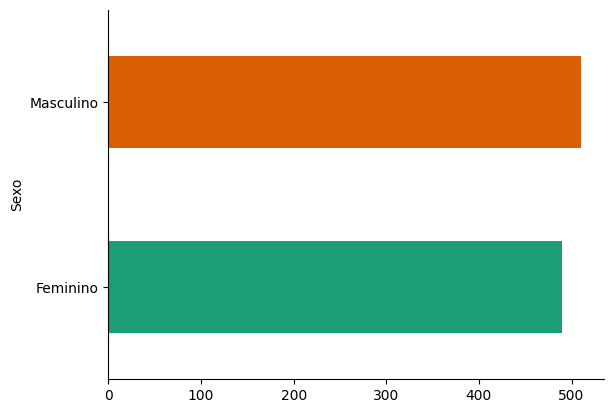

In [ ]:
# @title Gráfico para Vizualização de Divisão por Sexo

from matplotlib import pyplot as plt
import seaborn as sns

df_vendas.groupby("Sexo").size().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2"))

plt.gca().spines[["top", "right",]].set_visible(False)

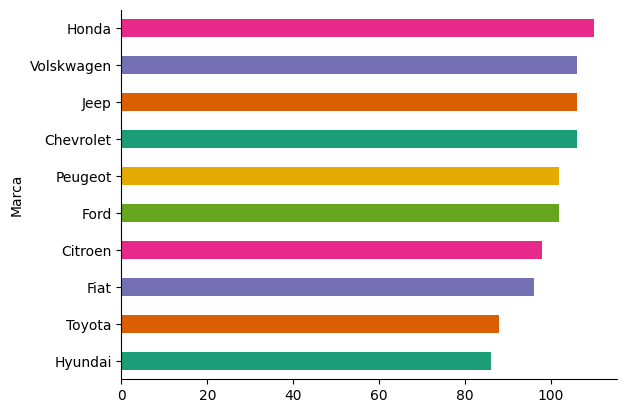

In [ ]:
# @title Gráfico para Vizualização de Divisão de Vendas por Marca

from matplotlib import pyplot as plt
import seaborn as sns

# Coloca em ordem crescente
(df_vendas.groupby("Marca").size().sort_values().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2")))

# Remove bordas desnecessárias
plt.gca().spines[['top', 'right']].set_visible(False)

#Conclusão:

Conseguimos gerar uma base de dados fictícios, mas conforme observado em gráfico tem uma distribuição muito homogênea.